<a href="https://colab.research.google.com/github/Harshavardhan341/ADR-Taskphase/blob/master/Rock_Paper_Scissors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import numpy as np

from numpy import savetxt
from numpy import loadtxt
import cv2
from google.colab.patches import cv2_imshow
import argparse
import os
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import scipy.io
import scipy.misc
import numpy as np
import pandas as pd
import PIL
import tensorflow as tf
from keras import backend as K
from keras.layers import Input, Lambda, Conv2D
from keras.models import load_model, Model

import numpy as np
from keras import layers
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D,Dropout, Convolution2D, GlobalAveragePooling2D
from keras.models import Model, load_model, Sequential
from keras.preprocessing import image
from keras.utils import layer_utils, np_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

from keras.initializers import glorot_uniform
import scipy.misc
from matplotlib.pyplot import imshow
%matplotlib inline

import keras.backend as K
K.set_image_data_format('channels_last')
K.set_learning_phase(1)
from skimage.transform import resize


from keras.optimizers import Adam



In [19]:
def get_one_hot(targets, nb_classes):
    res = np.eye(nb_classes)[np.array(targets).reshape(-1)]
    return res.reshape(list(targets.shape)+[nb_classes])

In [20]:
import glob

# Importing drive method from colab for accessing google drive
from google.colab import drive

In [21]:
# Mounting drive
# This will require authentication : Follow the steps as guided
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
Y = loadtxt('/content/drive/My Drive/rps_dataset/Y.csv')
Y=np.reshape(Y,(4796,1))
Y = Y.astype(int)
Y1=Y
Y=get_one_hot(Y,4)
Y=np.reshape(Y,(4796,4))
print(Y[0])

[0. 0. 1. 0.]


In [23]:
labels = []
for i in Y1:
  if i == 0:
    labels.append('None')
  if i == 1:
    labels.append('Rock')
  if i == 2:
    labels.append('Paper')
  if i == 3:
    labels.append('Scissors')
labels=np.array(labels)

print(labels)

['Paper' 'None' 'Rock' ... 'Paper' 'Paper' 'Rock']


In [24]:
X = np.load('/content/drive/My Drive/rps_dataset/X.npy')

  

In [25]:



X_resize = np.zeros((4796,128,128,3),dtype=np.float64)
for i in range(4796):
  X_resize[i]=cv2.resize(X[i],(128,128))




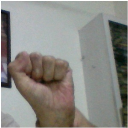

Rock


In [26]:
cv2_imshow(X_resize[4000])
print(labels[4000])

In [27]:
train_size=int(0.8*X.shape[0])
X_train = X_resize[:train_size]
X_train = X_train/255.
Y_train = Y[:train_size]
X_test  = X_resize[train_size:]
X_test = X_test/255.
Y_test  = Y[train_size:]
print(Y_train.shape)


(3836, 4)


In [28]:
input_shape=(3836,128,128,3)
print(input_shape[1:])

(128, 128, 3)


In [42]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape[1:]))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))


model.add(MaxPooling2D((2, 2)))


model.add(Flatten())
model.add(Dense(64, activation='relu'))

model.add(Dense(4, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, Y_train, epochs=3, batch_size=30)

Epoch 1/3
128/128 [==============================] - 2s 15ms/step - loss: 0.3177 - accuracy: 0.8764
Epoch 2/3
128/128 [==============================] - 2s 15ms/step - loss: 0.0079 - accuracy: 0.9984
Epoch 3/3
128/128 [==============================] - 2s 15ms/step - loss: 3.4747e-04 - accuracy: 1.0000


In [43]:
test_loss,test_acc = model.evaluate(X_test,Y_test)

30/30 [==============================] - 0s 6ms/step - loss: 0.0182 - accuracy: 1.0000


In [34]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 12544)            

In [35]:
model.save('mode.h5')